In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('../datasets/df_after_outlier_detection.csv')
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,year,weekday,monthly_quarters,hourly_quarters
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,1.683851,2015,3,Q2,H5
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2.458361,2009,4,Q3,H6
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,5.037958,2009,0,Q3,H6
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,1.662205,2009,4,Q2,H3
4,9.7,-73.975187,40.745767,-74.002720,40.743537,1,2.333443,2012,4,Q1,H3
...,...,...,...,...,...,...,...,...,...,...,...
163709,12.0,-73.983070,40.760770,-73.972972,40.754177,1,1.123230,2014,4,Q1,H4
163710,3.0,-73.987042,40.739367,-73.986525,40.740297,1,0.112245,2012,6,Q4,H3
163711,7.5,-73.984722,40.736837,-74.006672,40.739620,1,1.875639,2014,4,Q1,H1
163712,14.5,-73.997124,40.725452,-73.983215,40.695415,1,3.540827,2015,2,Q2,H4


**We will not consider the latitudes and longitudes because we have removed all outliers, and this data is entirely from New York.**

In [3]:
df = df.drop(columns=['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'])

In [4]:
df

,fare_amount,passenger_count,Distance,year,weekday,monthly_quarters,hourly_quarters
0,7.5,1,1.683851,2015,3,Q2,H5
1,7.7,1,2.458361,2009,4,Q3,H6
2,12.9,1,5.037958,2009,0,Q3,H6
3,5.3,3,1.662205,2009,4,Q2,H3
4,9.7,1,2.333443,2012,4,Q1,H3
...,...,...,...,...,...,...,...
163709,12.0,1,1.123230,2014,4,Q1,H4
163710,3.0,1,0.112245,2012,6,Q4,H3
163711,7.5,1,1.875639,2014,4,Q1,H1
163712,14.5,1,3.540827,2015,2,Q2,H4


**Data Preprocessing**

**Passenger_count,year,weekday,monthly_quarters,hourly_quarters are categorical columns. We would implement One Hot Encoding on them.**

In [5]:
df_ohe = df.copy()

In [6]:
df_ohe = pd.get_dummies(df_ohe, columns = ['passenger_count', 'year','weekday','monthly_quarters','hourly_quarters'],dtype='int16')

In [7]:
df_ohe

,fare_amount,Distance,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,year_2009,year_2010,...,monthly_quarters_Q1,monthly_quarters_Q2,monthly_quarters_Q3,monthly_quarters_Q4,hourly_quarters_H1,hourly_quarters_H2,hourly_quarters_H3,hourly_quarters_H4,hourly_quarters_H5,hourly_quarters_H6
0,7.5,1.683851,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,7.7,2.458361,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
2,12.9,5.037958,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3,5.3,1.662205,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
4,9.7,2.333443,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163709,12.0,1.123230,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
163710,3.0,0.112245,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
163711,7.5,1.875639,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
163712,14.5,3.540827,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


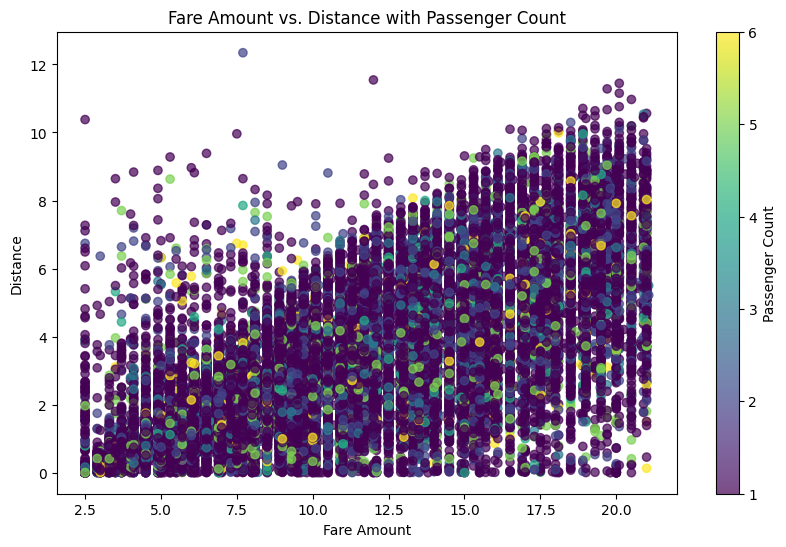

In [8]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data=df, x='fare_amount', y='Distance', c='passenger_count', cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Passenger Count')
plt.xlabel('Fare Amount')
plt.ylabel('Distance')
plt.title('Fare Amount vs. Distance with Passenger Count')
plt.show()

In [9]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163714 entries, 0 to 163713
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   fare_amount          163714 non-null  float64
 1   Distance             163714 non-null  float64
 2   passenger_count_1    163714 non-null  int16  
 3   passenger_count_2    163714 non-null  int16  
 4   passenger_count_3    163714 non-null  int16  
 5   passenger_count_4    163714 non-null  int16  
 6   passenger_count_5    163714 non-null  int16  
 7   passenger_count_6    163714 non-null  int16  
 8   year_2009            163714 non-null  int16  
 9   year_2010            163714 non-null  int16  
 10  year_2011            163714 non-null  int16  
 11  year_2012            163714 non-null  int16  
 12  year_2013            163714 non-null  int16  
 13  year_2014            163714 non-null  int16  
 14  year_2015            163714 non-null  int16  
 15  weekday_0        

In [10]:
df = df_ohe

In [11]:
X = df.iloc[:,1:]
y = df['fare_amount']

In [12]:
X

,Distance,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,year_2009,year_2010,year_2011,...,monthly_quarters_Q1,monthly_quarters_Q2,monthly_quarters_Q3,monthly_quarters_Q4,hourly_quarters_H1,hourly_quarters_H2,hourly_quarters_H3,hourly_quarters_H4,hourly_quarters_H5,hourly_quarters_H6
0,1.683851,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,2.458361,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,5.037958,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1.662205,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
4,2.333443,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163709,1.123230,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
163710,0.112245,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
163711,1.875639,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
163712,3.540827,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [13]:
y

0          7.5
1          7.7
2         12.9
3          5.3
4          9.7
          ... 
163709    12.0
163710     3.0
163711     7.5
163712    14.5
163713    14.1
Name: fare_amount, Length: 163714, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [15]:
X_train

,Distance,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,year_2009,year_2010,year_2011,...,monthly_quarters_Q1,monthly_quarters_Q2,monthly_quarters_Q3,monthly_quarters_Q4,hourly_quarters_H1,hourly_quarters_H2,hourly_quarters_H3,hourly_quarters_H4,hourly_quarters_H5,hourly_quarters_H6
154857,0.145586,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
108112,1.205799,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
101413,5.288386,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
125654,1.823269,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
73952,0.647442,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9372,3.798013,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
105595,3.146715,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
93553,0.466688,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
94735,0.601607,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [16]:
X_test

,Distance,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,year_2009,year_2010,year_2011,...,monthly_quarters_Q1,monthly_quarters_Q2,monthly_quarters_Q3,monthly_quarters_Q4,hourly_quarters_H1,hourly_quarters_H2,hourly_quarters_H3,hourly_quarters_H4,hourly_quarters_H5,hourly_quarters_H6
97393,2.097761,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
86589,2.416789,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
144356,5.330158,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
57272,4.588030,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
115442,2.635349,0,0,1,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120204,1.995444,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
109482,2.322004,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
835,1.536293,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
16383,5.149479,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0


In [17]:
y_train,y_test

(154857     4.5
 108112     5.5
 101413    18.1
 125654     9.0
 73952      4.1
           ... 
 9372      11.0
 105595    11.3
 93553      3.3
 94735      4.5
 83209     12.1
 Name: fare_amount, Length: 130971, dtype: float64,
 97393      6.9
 86589      6.1
 144356    17.0
 57272     14.5
 115442     7.7
           ... 
 120204     8.0
 109482     6.9
 835        8.0
 16383     14.5
 47451      4.5
 Name: fare_amount, Length: 32743, dtype: float64)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
Train_X_df = pd.DataFrame(X_train,columns=X.columns)
Train_X_df

,Distance,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,year_2009,year_2010,year_2011,...,monthly_quarters_Q1,monthly_quarters_Q2,monthly_quarters_Q3,monthly_quarters_Q4,hourly_quarters_H1,hourly_quarters_H2,hourly_quarters_H3,hourly_quarters_H4,hourly_quarters_H5,hourly_quarters_H6
0,-1.398280,0.662216,-0.414210,-0.216538,-0.14952,-0.275348,-0.147425,2.302176,-0.425871,-0.435104,...,-0.607973,-0.616094,1.880997,-0.553680,-0.327633,-0.279625,-0.486166,1.985288,-0.529518,-0.528005
1,-0.724761,0.662216,-0.414210,-0.216538,-0.14952,-0.275348,-0.147425,-0.434372,-0.425871,-0.435104,...,-0.607973,-0.616094,-0.531633,1.806098,-0.327633,-0.279625,-0.486166,-0.503705,1.888511,-0.528005
2,1.868773,0.662216,-0.414210,-0.216538,-0.14952,-0.275348,-0.147425,-0.434372,2.348127,-0.435104,...,1.644809,-0.616094,-0.531633,-0.553680,-0.327633,-0.279625,-0.486166,-0.503705,-0.529518,1.893923
3,-0.332502,0.662216,-0.414210,-0.216538,-0.14952,-0.275348,-0.147425,-0.434372,-0.425871,-0.435104,...,-0.607973,1.623130,-0.531633,-0.553680,-0.327633,-0.279625,-0.486166,-0.503705,-0.529518,1.893923
4,-1.079467,0.662216,-0.414210,-0.216538,-0.14952,-0.275348,-0.147425,-0.434372,2.348127,-0.435104,...,-0.607973,-0.616094,-0.531633,1.806098,-0.327633,-0.279625,-0.486166,1.985288,-0.529518,-0.528005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130966,0.921988,0.662216,-0.414210,-0.216538,-0.14952,-0.275348,-0.147425,-0.434372,-0.425871,-0.435104,...,-0.607973,-0.616094,1.880997,-0.553680,-0.327633,-0.279625,-0.486166,-0.503705,-0.529518,1.893923
130967,0.508240,-1.510081,2.414233,-0.216538,-0.14952,-0.275348,-0.147425,-0.434372,-0.425871,-0.435104,...,-0.607973,-0.616094,1.880997,-0.553680,-0.327633,-0.279625,-0.486166,1.985288,-0.529518,-0.528005
130968,-1.194294,-1.510081,-0.414210,4.618132,-0.14952,-0.275348,-0.147425,-0.434372,2.348127,-0.435104,...,-0.607973,-0.616094,-0.531633,1.806098,-0.327633,-0.279625,-0.486166,1.985288,-0.529518,-0.528005
130969,-1.108584,-1.510081,-0.414210,-0.216538,-0.14952,3.631764,-0.147425,2.302176,-0.425871,-0.435104,...,-0.607973,-0.616094,1.880997,-0.553680,-0.327633,-0.279625,-0.486166,-0.503705,-0.529518,1.893923


In [20]:
Test_X_df = pd.DataFrame(X_test,columns=X.columns)
Test_X_df

,Distance,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,year_2009,year_2010,year_2011,...,monthly_quarters_Q1,monthly_quarters_Q2,monthly_quarters_Q3,monthly_quarters_Q4,hourly_quarters_H1,hourly_quarters_H2,hourly_quarters_H3,hourly_quarters_H4,hourly_quarters_H5,hourly_quarters_H6
0,-0.158127,-1.510081,-0.414210,-0.216538,-0.14952,3.631764,-0.147425,2.302176,-0.425871,-0.435104,...,1.644809,-0.616094,-0.531633,-0.553680,3.052200,-0.279625,-0.486166,-0.503705,-0.529518,-0.528005
1,0.044541,0.662216,-0.414210,-0.216538,-0.14952,-0.275348,-0.147425,2.302176,-0.425871,-0.435104,...,-0.607973,-0.616094,1.880997,-0.553680,-0.327633,-0.279625,-0.486166,-0.503705,-0.529518,1.893923
2,1.895310,0.662216,-0.414210,-0.216538,-0.14952,-0.275348,-0.147425,-0.434372,-0.425871,-0.435104,...,-0.607973,-0.616094,1.880997,-0.553680,-0.327633,3.576216,-0.486166,-0.503705,-0.529518,-0.528005
3,1.423860,-1.510081,2.414233,-0.216538,-0.14952,-0.275348,-0.147425,-0.434372,-0.425871,2.298301,...,-0.607973,1.623130,-0.531633,-0.553680,-0.327633,-0.279625,2.056913,-0.503705,-0.529518,-0.528005
4,0.183386,-1.510081,-0.414210,4.618132,-0.14952,-0.275348,-0.147425,2.302176,-0.425871,-0.435104,...,-0.607973,-0.616094,-0.531633,1.806098,3.052200,-0.279625,-0.486166,-0.503705,-0.529518,-0.528005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32738,-0.223125,-1.510081,-0.414210,-0.216538,-0.14952,-0.275348,6.783097,-0.434372,-0.425871,-0.435104,...,-0.607973,-0.616094,-0.531633,1.806098,-0.327633,-0.279625,-0.486166,-0.503705,-0.529518,1.893923
32739,-0.015672,-1.510081,2.414233,-0.216538,-0.14952,-0.275348,-0.147425,2.302176,-0.425871,-0.435104,...,-0.607973,-0.616094,1.880997,-0.553680,-0.327633,-0.279625,-0.486166,-0.503705,-0.529518,1.893923
32740,-0.514809,0.662216,-0.414210,-0.216538,-0.14952,-0.275348,-0.147425,-0.434372,-0.425871,-0.435104,...,-0.607973,1.623130,-0.531633,-0.553680,-0.327633,-0.279625,2.056913,-0.503705,-0.529518,-0.528005
32741,1.780530,0.662216,-0.414210,-0.216538,-0.14952,-0.275348,-0.147425,2.302176,-0.425871,-0.435104,...,1.644809,-0.616094,-0.531633,-0.553680,-0.327633,3.576216,-0.486166,-0.503705,-0.529518,-0.528005


In [21]:
df.to_csv('../datasets/df_after_preprocess.csv',index=False)

In [22]:
df

,fare_amount,Distance,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,year_2009,year_2010,...,monthly_quarters_Q1,monthly_quarters_Q2,monthly_quarters_Q3,monthly_quarters_Q4,hourly_quarters_H1,hourly_quarters_H2,hourly_quarters_H3,hourly_quarters_H4,hourly_quarters_H5,hourly_quarters_H6
0,7.5,1.683851,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,7.7,2.458361,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
2,12.9,5.037958,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3,5.3,1.662205,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
4,9.7,2.333443,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163709,12.0,1.123230,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
163710,3.0,0.112245,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
163711,7.5,1.875639,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
163712,14.5,3.540827,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


**Variance Threshold**

In [23]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.05)
selector.fit_transform(X_train)

array([[-1.39827991,  0.66221628, -0.41421029, ...,  1.98528828,
        -0.52951779, -0.52800463],
       [-0.7247611 ,  0.66221628, -0.41421029, ..., -0.50370518,
         1.88851068, -0.52800463],
       [ 1.86877345,  0.66221628, -0.41421029, ..., -0.50370518,
        -0.52951779,  1.8939228 ],
       ...,
       [-1.194294  , -1.51008067, -0.41421029, ...,  1.98528828,
        -0.52951779, -0.52800463],
       [-1.10858444, -1.51008067, -0.41421029, ..., -0.50370518,
        -0.52951779,  1.8939228 ],
       [ 0.81487831,  0.66221628, -0.41421029, ..., -0.50370518,
         1.88851068, -0.52800463]])

In [24]:
selector.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [25]:
for i in Train_X_df.columns:
    print(Train_X_df[i].var())

1.0000076353363365
1.0000076353363365
1.0000076353363365
1.000007635336336
1.0000076353363363
1.000007635336336
1.0000076353363365
1.0000076353363367
1.000007635336336
1.0000076353363365
1.000007635336336
1.0000076353363367
1.0000076353363365
1.0000076353363365
1.0000076353363365
1.0000076353363365
1.000007635336337
1.0000076353363365
1.0000076353363365
1.0000076353363363
1.0000076353363365
1.0000076353363367
1.0000076353363367
1.0000076353363372
1.0000076353363365
1.000007635336336
1.000007635336337
1.0000076353363365
1.000007635336337
1.0000076353363365
1.0000076353363367


**All columns have variances above the threshold level.**

**Correlation**

In [26]:
# we will use multicollinearity approach and remove one of the two highly correlated columns

In [27]:
import seaborn as sns

<Axes: >

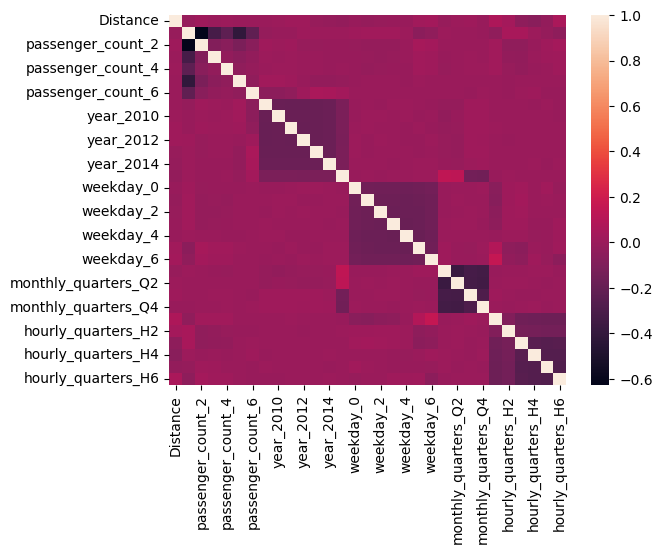

In [28]:
sns.heatmap(Train_X_df.corr())

In [29]:
corr_matrix = Train_X_df.corr()
corr_matrix

,Distance,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,year_2009,year_2010,year_2011,...,monthly_quarters_Q1,monthly_quarters_Q2,monthly_quarters_Q3,monthly_quarters_Q4,hourly_quarters_H1,hourly_quarters_H2,hourly_quarters_H3,hourly_quarters_H4,hourly_quarters_H5,hourly_quarters_H6
Distance,1.000000,-0.015794,0.015572,0.002795,0.003724,0.002225,0.000504,0.002115,0.008641,0.016198,...,-0.013955,0.008605,0.014249,-0.008388,0.068287,0.035944,-0.044215,-0.061982,-0.026148,0.057100
passenger_count_1,-0.015794,1.000000,-0.625491,-0.326990,-0.225788,-0.415798,-0.222624,-0.016229,-0.008579,-0.007370,...,0.006206,0.001416,-0.002086,-0.005952,-0.041128,0.050423,0.051533,0.007057,-0.016632,-0.041485
passenger_count_2,0.015572,-0.625491,1.000000,-0.089692,-0.061933,-0.114052,-0.061065,0.017822,0.008952,0.010267,...,0.000086,-0.000297,-0.001062,0.001262,0.025747,-0.039381,-0.041118,-0.009058,0.016440,0.037793
passenger_count_3,0.002795,-0.326990,-0.089692,1.000000,-0.032377,-0.059623,-0.031923,0.004838,0.001683,0.004667,...,-0.004582,-0.000575,0.004667,0.000840,0.028117,-0.025535,-0.030173,-0.002216,0.009677,0.017090
passenger_count_4,0.003724,-0.225788,-0.061933,-0.032377,1.000000,-0.041170,-0.022043,0.002914,0.005693,0.004582,...,-0.010341,-0.001987,0.006916,0.006162,0.023710,-0.013829,-0.023568,-0.003716,0.000104,0.017654
passenger_count_5,0.002225,-0.415798,-0.114052,-0.059623,-0.041170,1.000000,-0.040593,0.026934,0.026563,0.014332,...,-0.001409,-0.002039,0.001089,0.002559,0.002447,-0.005678,0.000112,-0.001626,0.002146,0.001139
passenger_count_6,0.000504,-0.222624,-0.061065,-0.031923,-0.022043,-0.040593,1.000000,-0.049557,-0.049867,-0.038399,...,-0.000462,0.002662,-0.006371,0.003910,-0.000549,-0.003681,0.003283,0.009508,-0.005003,-0.004662
year_2009,0.002115,-0.016229,0.017822,0.004838,0.002914,0.026934,-0.049557,1.000000,-0.184986,-0.188997,...,-0.018756,-0.019268,0.018251,0.022101,0.002738,0.000112,-0.000387,-0.003387,0.005329,-0.003705
year_2010,0.008641,-0.008579,0.008952,0.001683,0.005693,0.026563,-0.049867,-0.184986,1.000000,-0.185298,...,-0.030223,-0.006174,0.020560,0.018056,0.000349,0.001784,0.000921,0.000099,0.001886,-0.004233
year_2011,0.016198,-0.007370,0.010267,0.004667,0.004582,0.014332,-0.038399,-0.188997,-0.185298,1.000000,...,-0.021411,-0.013696,0.016418,0.020802,0.005082,-0.001199,0.000289,-0.001302,-0.000426,-0.001470


In [30]:
columns = corr_matrix.columns
columns_to_remove = []
for i in range(len(columns)):
    for j in range(i+1,len(columns)):
        if(corr_matrix.loc[columns[i],columns[j]] > 0.95):
            columns_to_remove.append(columns[j])
print(len(columns_to_remove))

0


**There are no such columns having correlation above 0.9 or below -0.9**

In [31]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=10)

In [32]:
rfr.fit(X_train,y_train)

RandomForestRegressor(max_depth=10)

In [33]:
rfr.predict(X_test)

array([ 7.78238851,  8.25767588, 13.43334693, ...,  8.17162155,
       12.33483788,  4.47599779])

In [34]:
y_test

97393      6.9
86589      6.1
144356    17.0
57272     14.5
115442     7.7
          ... 
120204     8.0
109482     6.9
835        8.0
16383     14.5
47451      4.5
Name: fare_amount, Length: 32743, dtype: float64

In [35]:
y_pred = rfr.predict(X_test)

In [36]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7253166476208637

# Model Selection

### Regression Metrics
- MAE (Mean Absolute Error)
- MSE (Mean Squared Error)
- RMSE (Root Mean Squared Error)
- R2Score (Coefficient of Determination)
- Adjusted R2Score

In [37]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV

In [38]:
def adjusted_r2score(r2_score):
    return (1 - ((1-r2_score) * (y_test.shape[0] - 1) / (y_test.shape[0] - 1 - X_test.shape[1])))

**Linear Regression**

In [39]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
# LR.fit(X_train,y_train)
y_pred_LR = LR.predict(X_test)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
print("MAE (Mean Absolute Error) : ",mean_absolute_error(y_test,y_pred_LR))
print("MSE (Mean Squared Error) :",mean_squared_error(y_test,y_pred_LR))
print("RMSE (Root Mean Squared Error) :",np.sqrt(mean_squared_error(y_test,y_pred_LR)))
print("R2Score (Coefficient of Determination) :",r2_score(y_test,y_pred_LR))
print("Adjusted R2Score (Coefficient of Determination) :",adjusted_r2score(r2_score(y_test,y_pred_LR)))

MAE (Mean Absolute Error) :  1.4472967927592144
MSE (Mean Squared Error) : 4.1205184461305215
RMSE (Root Mean Squared Error) : 2.029906019038941
R2Score (Coefficient of Determination) : 0.7073978547244536
Adjusted R2Score (Coefficient of Determination) : 0.7071205575918822


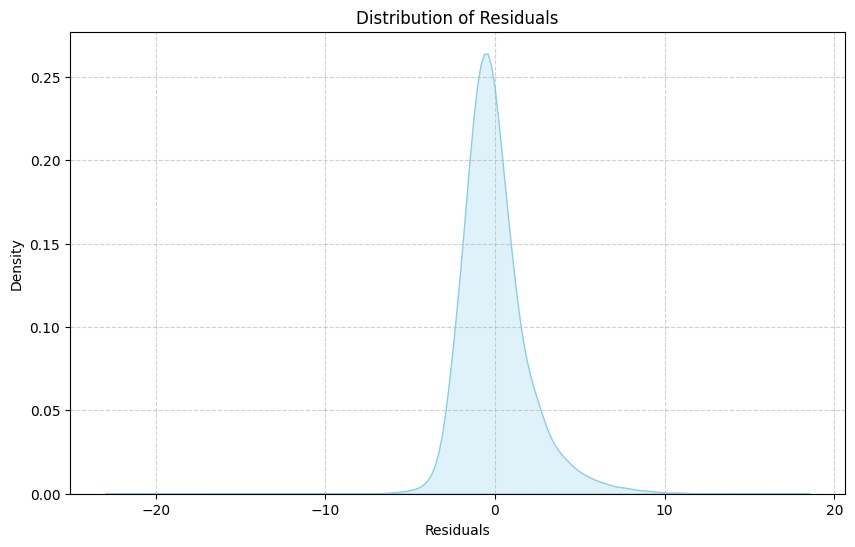

In [ ]:
residuals = y_test - y_pred_LR

plt.figure(figsize=(10, 6))
sns.kdeplot(x=residuals, fill=True, color='skyblue', bw_adjust=1.5)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
LR.coef_

array([ 3.12560499e+00, -7.82611099e+12, -6.01059926e+12, -3.51640116e+12,
       -2.48635415e+12, -4.35120289e+12, -2.45300939e+12, -6.02963976e+11,
       -5.94823546e+11, -6.03657300e+11, -6.04419153e+11, -5.96248817e+11,
       -5.83688653e+11, -4.14914132e+11,  1.02983918e+12,  1.08915385e+12,
        1.09715572e+12,  1.11748118e+12,  1.12501319e+12,  1.11665311e+12,
        1.03516211e+12, -4.71782904e+11, -4.74639707e+11, -4.40525210e+11,
       -4.50391634e+11, -8.96518646e+11, -7.85842210e+11, -1.19150219e+12,
       -1.21739294e+12, -1.25312134e+12, -1.25110399e+12])

In [ ]:
LR.intercept_

8.597982283368564

In [ ]:
param_space = {'copy_X': [True,False], 'fit_intercept': [True,False], 
               'n_jobs': [1,5,10,15,None], 'positive': [True,False]}
grid_search = GridSearchCV(LR, param_space, cv=5)
# grid_search.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File 

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [1, 5, 10, 15, None],
                         'positive': [True, False]})

In [ ]:
print(f"Best Hyperparameters : {grid_search.best_params_}")

Best Hyperparameters : {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': False}


In [ ]:
print(f"Best R2 Score : {grid_search.best_score_}")

Best R2 Score : 0.7056743634338403


**Conclusion of Linear Regression**
- Best R2 Score : 0.7056743634338403
- Best Hyperparameters : {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': False}
- The residual plot resembles a normal distribution.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

**Polynomial Linear Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(degree=2,include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:
LR_Poly_2 = LinearRegression()
LR_Poly_2.fit(X_train_poly,y_train)

LinearRegression()

In [ ]:
r2_score(y_test,LR_Poly_2.predict(X_test_poly))

0.7313469903238834

In [ ]:
y_pred_Poly_2 = LR_Poly_2.predict(X_test_poly)
print("MAE (Mean Absolute Error) : ",mean_absolute_error(y_test,y_pred_Poly_2))
print("MSE (Mean Squared Error) :",mean_squared_error(y_test,y_pred_Poly_2))
print("RMSE (Root Mean Squared Error) :",np.sqrt(mean_squared_error(y_test,y_pred_Poly_2)))
print("R2Score (Coefficient of Determination) :",r2_score(y_test,y_pred_Poly_2))
print("Adjusted R2Score (Coefficient of Determination) :",adjusted_r2score(r2_score(y_test,y_pred_Poly_2)))

MAE (Mean Absolute Error) :  1.3695852117663987
MSE (Mean Squared Error) : 3.783258940006938
RMSE (Root Mean Squared Error) : 1.9450601378895558
R2Score (Coefficient of Determination) : 0.7313469903238834
Adjusted R2Score (Coefficient of Determination) : 0.7310923896299284


In [ ]:
def polynomial_regression(X_train,X_test,y_train,y_test):
    for i in range(1,3):
        poly = PolynomialFeatures(degree=i,include_bias=True)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)
        LR_Poly = LinearRegression()
        LR_Poly.fit(X_train_poly,y_train)
        
        print(i , r2_score(y_test,LR_Poly.predict(X_test_poly)))

In [ ]:
# polynomial_regression(X_train,X_test,y_train,y_test)

1 0.7073719354811886
2 0.7313469903238834


**Conclusion of Polynomial Regression**
- Best R2 Score : 0.7313469903238834
- Degree : 2
- Computation above degree 2 is not possible.

**Regularization Models**

**Ridge Regression , Lasso Regression , Elastic Net Regression**

In [40]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [41]:
R_0 = Ridge(alpha = 0)
R_0.fit(X_train,y_train)
r2_score(y_test,R_0.predict(X_test))

0.7074172410631658

In [ ]:
R_1 = Ridge(alpha = 1)
R_1.fit(X_train,y_train)
y_pred_R1 = R_1.predict(X_test)
r2_score(y_test,y_pred_R1)

0.707387804708661

In [ ]:
alphas = [0,0.0001,0.0005,0.001,0.005,0.1,0.5,1,5,10]
for i in alphas:
    reg = Ridge(alpha=i)
    # reg.fit(X_train,y_train)
    print(i,r2_score(y_test,reg.predict(X_test)))

0 0.7074172410631658
0.0001 0.7073878516098793
0.0005 0.7073878515911345
0.001 0.7073878515677037
0.005 0.7073878513802561
0.1 0.70738784692796
0.5 0.7073878281726828
1 0.707387804708661
5 0.7073876161995403
10 0.7073873785710798


- Max R2 Score at alpha = 0 i.e. Linear Regression

In [ ]:
print("MAE (Mean Absolute Error) : ",mean_absolute_error(y_test,y_pred_R1))
print("MSE (Mean Squared Error) :",mean_squared_error(y_test,y_pred_R1))
print("RMSE (Root Mean Squared Error) :",np.sqrt(mean_squared_error(y_test,y_pred_R1)))
print("R2Score (Coefficient of Determination) :",r2_score(y_test,y_pred_R1))
print("Adjusted R2Score (Coefficient of Determination) :",adjusted_r2score(r2_score(y_test,y_pred_R1)))

MAE (Mean Absolute Error) :  1.447324630237054
MSE (Mean Squared Error) : 4.120659973717129
RMSE (Root Mean Squared Error) : 2.029940879364995
R2Score (Coefficient of Determination) : 0.707387804708661
Adjusted R2Score (Coefficient of Determination) : 0.7071104980517557


**Lasso Regression**

In [ ]:
alphas = [0,0.0001,0.0005,0.001,0.005,0.1,0.5,1,5,10]
for i in alphas:
    reg = Lasso(alpha=i)
    # reg.fit(X_train,y_train)
    print(i,r2_score(y_test,reg.predict(X_test)))

0 0.7073878516145653
0.0001 0.7073882905871863
0.0005 0.7073899696092376
0.001 0.7073922613888857
0.005 0.7073749617283737
0.1 0.6963441986672849
0.5 0.6391638164139066
1 0.5852112340740421
5 -1.0898425859551253e-05
10 -1.0898425859551253e-05


In [ ]:
LassoReg = Lasso(alpha = 0.001)
LassoReg.fit(X_train,y_train)
y_pred_Lasso = LassoReg.predict(X_test)

In [ ]:
print("MAE (Mean Absolute Error) : ",mean_absolute_error(y_test,y_pred_Lasso))
print("MSE (Mean Squared Error) :",mean_squared_error(y_test,y_pred_Lasso))
print("RMSE (Root Mean Squared Error) :",np.sqrt(mean_squared_error(y_test,y_pred_Lasso)))
print("R2Score (Coefficient of Determination) :",r2_score(y_test,y_pred_Lasso))
print("Adjusted R2Score (Coefficient of Determination) :",adjusted_r2score(r2_score(y_test,y_pred_Lasso)))

MAE (Mean Absolute Error) :  1.4472607038385925
MSE (Mean Squared Error) : 4.120597213298688
RMSE (Root Mean Squared Error) : 2.0299254206247794
R2Score (Coefficient of Determination) : 0.7073922613888857
Adjusted R2Score (Coefficient of Determination) : 0.7071149589555469


- Max R2Score at alpha = 0.005

**Elastic Net Regression**

In [ ]:
ElasticNetReg = ElasticNet(alpha=0.0001,l1_ratio=0.8)
# ElasticNetReg.fit(X_train,y_train)
y_pred_ElasticNet = ElasticNetReg.predict(X_test)
r2_score(y_test,y_pred_ElasticNet)

0.7073880968140261

- Max R2Score at alpha = 0.0001 and l1 ratio = 0.8

In [ ]:
print("MAE (Mean Absolute Error) : ",mean_absolute_error(y_test,y_pred_ElasticNet))
print("MSE (Mean Squared Error) :",mean_squared_error(y_test,y_pred_ElasticNet))
print("RMSE (Root Mean Squared Error) :",np.sqrt(mean_squared_error(y_test,y_pred_ElasticNet)))
print("R2Score (Coefficient of Determination) :",r2_score(y_test,y_pred_ElasticNet))
print("Adjusted R2Score (Coefficient of Determination) :",adjusted_r2score(r2_score(y_test,y_pred_ElasticNet)))

MAE (Mean Absolute Error) :  1.447323428224354
MSE (Mean Squared Error) : 4.1206558601945025
RMSE (Root Mean Squared Error) : 2.0299398661523207
R2Score (Coefficient of Determination) : 0.7073880968140261
Adjusted R2Score (Coefficient of Determination) : 0.7071107904339471


**Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
# DT.fit(X_train,y_train)
y_pred_DT = DT.predict(X_test)

In [ ]:
print("MAE (Mean Absolute Error) : ",mean_absolute_error(y_test,y_pred_DT))
print("MSE (Mean Squared Error) :",mean_squared_error(y_test,y_pred_DT))
print("RMSE (Root Mean Squared Error) :",np.sqrt(mean_squared_error(y_test,y_pred_DT)))
print("R2Score (Coefficient of Determination) :",r2_score(y_test,y_pred_DT))
print("Adjusted R2Score (Coefficient of Determination) :",adjusted_r2score(r2_score(y_test,y_pred_DT)))

MAE (Mean Absolute Error) :  1.9834764682527566
MSE (Mean Squared Error) : 7.8961069388877005
RMSE (Root Mean Squared Error) : 2.8100012346772556
R2Score (Coefficient of Determination) : 0.4392895311964138
Adjusted R2Score (Coefficient of Determination) : 0.43875814956537496


In [ ]:
y_test

97393      6.9
86589      6.1
144356    17.0
57272     14.5
115442     7.7
          ... 
120204     8.0
109482     6.9
835        8.0
16383     14.5
47451      4.5
Name: fare_amount, Length: 32743, dtype: float64

In [ ]:
param_grid_DT = {
    'max_depth':[2,4,8,10,None],
    'criterion':['absolute_error','poisson'],
    'max_features':[0.25,0.5,1.0],
    'min_samples_split':[0.25,0.5,1.0]
}

In [ ]:
# DT_CV= GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid_DT)

In [ ]:
DT_9 = DecisionTreeRegressor(max_depth = 9,splitter='best',min_samples_split=300,min_samples_leaf = 30,max_leaf_nodes = 300,min_impurity_decrease = 0.0002)
DT_9.fit(X_train,y_train)
y_pred_DT9 = DT_9.predict(X_test)

In [ ]:
print("MAE (Mean Absolute Error) : ",mean_absolute_error(y_test,y_pred_DT9))
print("MSE (Mean Squared Error) :",mean_squared_error(y_test,y_pred_DT9))
print("RMSE (Root Mean Squared Error) :",np.sqrt(mean_squared_error(y_test,y_pred_DT9)))
print("R2Score (Coefficient of Determination) :",r2_score(y_test,y_pred_DT9))
print("Adjusted R2Score (Coefficient of Determination) :",adjusted_r2score(r2_score(y_test,y_pred_DT9)))

MAE (Mean Absolute Error) :  1.4299058752078608
MSE (Mean Squared Error) : 4.007439036650521
RMSE (Root Mean Squared Error) : 2.001858895289706
R2Score (Coefficient of Determination) : 0.7154277369426516
Adjusted R2Score (Coefficient of Determination) : 0.715158049676754


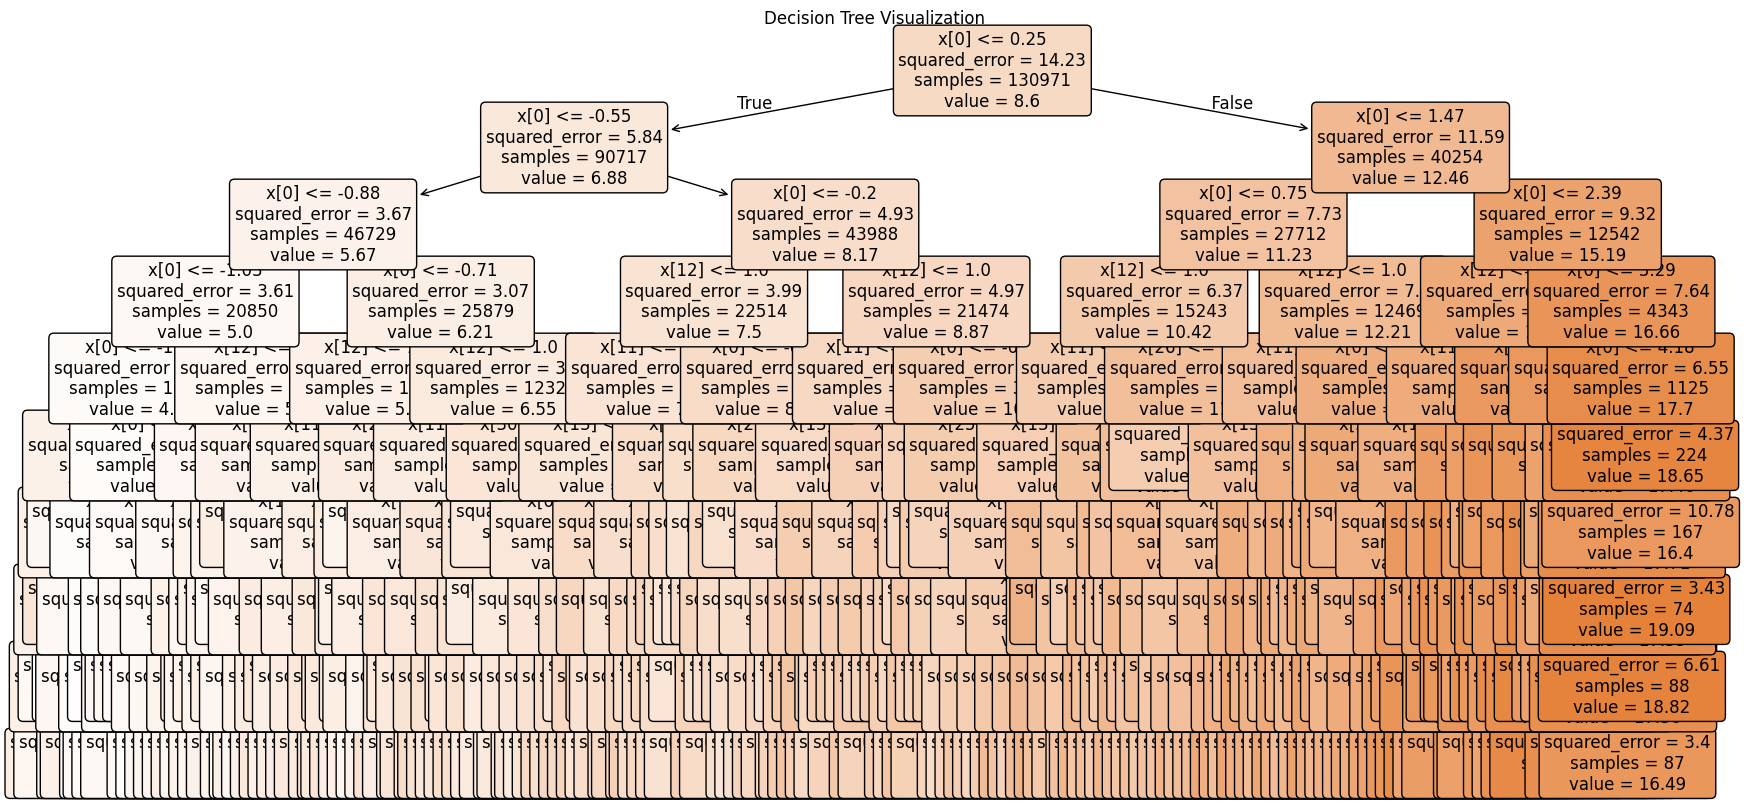

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10)) 
plot_tree(DT_9,
          filled=True,         
          rounded=True,        
          precision=2,         
          fontsize=12)         

plt.title("Decision Tree Visualization")
plt.show()

- We have increased R2 Score of Decision Tree Regressor from 0.4392895311964138 to 0.7154277369426516 using HyperParameter Tuning.

**Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)
r2_score(y_test,y_pred_rfr)

0.6988223694805986

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr_hyper = RandomForestRegressor(n_estimators = 50,max_depth = 13,min_samples_split = 40,min_samples_leaf = 6,min_impurity_decrease = 0.0002)
rfr_hyper.fit(X_train,y_train)
y_pred_rfr = rfr_hyper.predict(X_test)
r2_score(y_test,rfr_hyper.predict(X_test))

0.7300103563039331

- We have increased R2 Score of Random Forest Regressor from 0.6988223694805986 to 0.7300103563039331 using HyperParameter Tuning.

In [ ]:
print("MAE (Mean Absolute Error) : ",mean_absolute_error(y_test,y_pred_rfr))
print("MSE (Mean Squared Error) :",mean_squared_error(y_test,y_pred_rfr))
print("RMSE (Root Mean Squared Error) :",np.sqrt(mean_squared_error(y_test,y_pred_rfr)))
print("R2Score (Coefficient of Determination) :",r2_score(y_test,y_pred_rfr))
print("Adjusted R2Score (Coefficient of Determination) :",adjusted_r2score(r2_score(y_test,y_pred_rfr)))

MAE (Mean Absolute Error) :  1.3839978342271881
MSE (Mean Squared Error) : 3.8020818544108783
RMSE (Root Mean Squared Error) : 1.9498927802345642
R2Score (Coefficient of Determination) : 0.7300103563039331
Adjusted R2Score (Coefficient of Determination) : 0.7297544888906905


**KNN Regressor**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train,y_train)
y_pred_knn = knn_reg.predict(X_test)
y_pred_knn
r2_score(y_test,y_pred_knn)

0.6124077784485593

In [ ]:
print("MAE (Mean Absolute Error) : ",mean_absolute_error(y_test,y_pred_knn))
print("MSE (Mean Squared Error) :",mean_squared_error(y_test,y_pred_knn))
print("RMSE (Root Mean Squared Error) :",np.sqrt(mean_squared_error(y_test,y_pred_knn)))
print("R2Score (Coefficient of Determination) :",r2_score(y_test,y_pred_knn))
print("Adjusted R2Score (Coefficient of Determination) :",adjusted_r2score(r2_score(y_test,y_pred_knn)))

MAE (Mean Absolute Error) :  1.6686549796903154
MSE (Mean Squared Error) : 5.4581995527593685
RMSE (Root Mean Squared Error) : 2.3362789972003277
R2Score (Coefficient of Determination) : 0.6124077784485593
Adjusted R2Score (Coefficient of Determination) : 0.6120404598441725


**Support Vector Machines Regressor**

In [42]:
from sklearn.svm import SVR
svr = SVR()
# svr.fit(X_train,y_train)
# y_pred_svr = svr.predict(X_test)
# r2_score(y_test,y_pred_svr)

**Voting Ensemble**

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [46]:
lr = LinearRegression()
dt = DecisionTreeRegressor(max_depth = 9,splitter='best',min_samples_split=300,min_samples_leaf = 30,max_leaf_nodes = 300,min_impurity_decrease = 0.0002)

In [47]:
estimators = [('lr',lr),('dt',dt)]

In [48]:
for estimator in estimators:
  scores = cross_val_score(estimator[1],X,y,scoring='r2',cv=10)
  print(estimator[0],np.round(np.mean(scores),2))

lr 0.71
dt 0.71


In [49]:
from sklearn.ensemble import VotingRegressor

In [50]:
vr = VotingRegressor(estimators)
scores = cross_val_score(vr,X,y,scoring='r2',cv=10)
print("Voting Regressor",np.round(np.mean(scores),2))

Voting Regressor 0.72
